In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

## Load Dataset

In [133]:
df = pd.read_excel("Data/bereinigte_DATEN_ano.xlsx")

In [134]:
df.head()

,Unnamed: 0,V1,athlete,gender,run,location,date,TurnNr,MinimalRadius,VelocityAtMinRadius,...,azitonextnext,HORIZONTALGATEDISTANCE,VERTICALGATEDISTANCE,regularbs1orfs2,steepness_A,filter_$,goofy2_regular1,@2Ferse_3Zehe_4Ferse,Zehen1_Fersen2,DistanzSchätz
0,0,35,3,1,1,Zermatt,200915,2,10.63,53.6,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
1,1,36,3,1,2,Zermatt,200915,2,11.05,52.3,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
2,2,37,3,1,3,Zermatt,200915,2,10.99,52.8,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
3,3,38,3,1,4,Zermatt,200915,2,11.41,52.2,...,341.45477,8.515579,20.414966,1,2,0,1,2,2,30.635388
4,4,39,5,1,1,Zermatt,200915,2,11.31,49.7,...,341.45477,8.515579,20.414966,1,2,0,2,3,1,30.635388


In [135]:
df['location'].nunique()

7

In [136]:
df = df.loc[df['location'] == 'Zermatt']

In [137]:
df = df.drop(["date", "location", "Unnamed0", "vectortonext", "vector2Dtonext", "vectortonextnorm", "vector2Dtonextnorm", "projpttonext", "vectortonextnext", "vector2Dtonextnext", "vectortonextnextnorm", "vector2Dtonextnextnorm"], axis=1)

In [138]:
df.columns

Index(['Unnamed: 0', 'V1', 'athlete', 'gender', 'run', 'TurnNr',
       'MinimalRadius', 'VelocityAtMinRadius', 'VelocityAtTurnEntry',
       'VelocityAtTurnExit', 'TimeStarttoEnd', 'TimeStartToMinRad',
       'TimeMinRadToEnd', 'GlideTime_endtostart', 'TimeStarttoEnd_2',
       'Initiation', 'Completion', 'Gliding', 'GATEDISTANCE', 'dist2Dtonext',
       'STEEPNESS', 'azitonext', 'slopechangetonext', 'angletonext',
       'projtonext', 'offsettonext', 'dist3Dtonextnext', 'dts2Dtonextnext',
       'slopetonextnext', 'azitonextnext', 'HORIZONTALGATEDISTANCE',
       'VERTICALGATEDISTANCE', 'regularbs1orfs2', 'steepness_A', 'filter_$',
       'goofy2_regular1', '@2Ferse_3Zehe_4Ferse', 'Zehen1_Fersen2',
       'DistanzSchätz'],
      dtype='object')

## Standardize the Data

In [139]:
len(df.columns)

39

In [142]:
df.iloc[:, 17]

0       0.157895
1       0.153846
2       0.153846
3       0.136364
4       0.134615
          ...   
1367    0.152174
1368    0.179487
1369    0.162162
1370    0.179487
1371    0.179487
Name: Gliding, Length: 1372, dtype: float64

In [143]:
features = df.columns[4:17]

In [144]:
print(features)

Index(['run', 'TurnNr', 'MinimalRadius', 'VelocityAtMinRadius',
       'VelocityAtTurnEntry', 'VelocityAtTurnExit', 'TimeStarttoEnd',
       'TimeStartToMinRad', 'TimeMinRadToEnd', 'GlideTime_endtostart',
       'TimeStarttoEnd_2', 'Initiation', 'Completion'],
      dtype='object')


In [145]:
# distribute the dataset into two components X and Y
x = df.iloc[:, 4:17]
y = df.iloc[:, 3]

In [146]:
x = StandardScaler().fit_transform(x)

In [147]:
pd.DataFrame(data = x, columns = features).head()

,run,TurnNr,MinimalRadius,VelocityAtMinRadius,VelocityAtTurnEntry,VelocityAtTurnExit,TimeStarttoEnd,TimeStartToMinRad,TimeMinRadToEnd,GlideTime_endtostart,TimeStarttoEnd_2,Initiation,Completion
0,-1.415831,-1.608522,-0.508820,0.870012,0.698833,0.660796,-0.756735,-0.617004,-0.496422,0.558471,-0.493041,-0.475874,-0.179454
1,-0.867871,-1.608522,-0.333047,0.599001,1.122574,0.749057,-0.591699,-0.832023,0.082245,0.558471,-0.340412,-0.955203,0.519198
2,-0.319910,-1.608522,-0.358157,0.703236,0.974265,1.322750,-0.591699,-0.832023,0.082245,0.558471,-0.340412,-0.955203,0.519198
3,0.228051,-1.608522,-0.182384,0.578154,0.444589,0.594601,0.233480,0.673110,-0.496422,0.558471,0.422733,0.562670,-1.170271
4,-1.415831,-1.608522,-0.224235,0.056980,-0.508829,1.300685,1.388730,1.748205,0.082245,0.970640,1.643765,0.815648,-1.471962


## PCA Projection to 2D

In [148]:
pca = PCA(n_components=3)

In [149]:
principalComponents = pca.fit_transform(x)

In [150]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [151]:
principalDf.head(5)

,principal component 1,principal component 2,principal component 3
0,-1.245515,-0.338988,-0.368270
1,-1.292964,0.637637,-0.762438
2,-1.435687,0.727368,-0.720285
3,0.378374,-0.834475,1.215738
4,1.829541,-0.431842,2.592395


In [152]:
df[['athlete']].head()

,athlete
0,3
1,3
2,3
3,3
4,5


In [153]:
finalDf = pd.concat([principalDf, df[['athlete']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,athlete
0,-1.245515,-0.338988,-0.368270,3
1,-1.292964,0.637637,-0.762438,3
2,-1.435687,0.727368,-0.720285,3
3,0.378374,-0.834475,1.215738,3
4,1.829541,-0.431842,2.592395,5


## Visualize 2D Projection

In [154]:
df['athlete'].nunique()

6

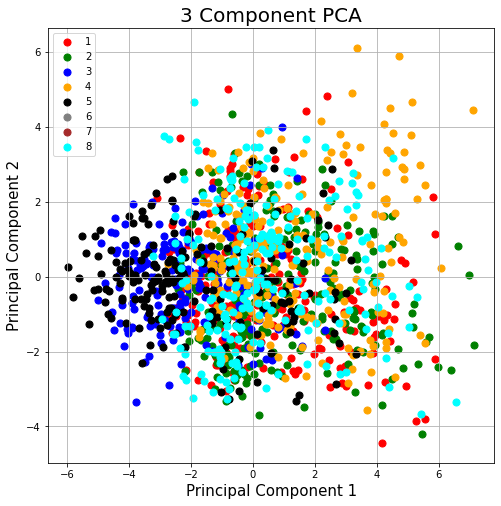

In [155]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)


targets = [1, 2, 3, 4, 5, 6, 7, 8]
colors = ['r', 'g', 'b', 'orange', 'black', 'grey', 'brown', 'cyan']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['athlete'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()